In [1]:
#default general imports
import qiskit
from qiskit import * 
from qiskit.ml.datasets import ad_hoc_data
from qiskit.tools import job_monitor
from qiskit.visualization import plot_histogram, plot_bloch_multivector
import numpy as np
from ipynb.fs.full.quantum_algs import run_program

#imports specific to this alg
from matplotlib import pyplot as plt
from qiskit import BasicAer
from qiskit.aqua import QuantumInstance
from qiskit.circuit.library import ZZFeatureMap
from qiskit.aqua.algorithms import QSVM
from qiskit.aqua.utils import split_dataset_to_data_and_labels, map_label_to_class_name



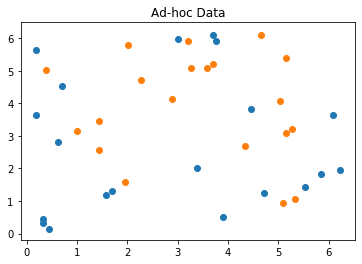

{'A': 0, 'B': 1}


In [2]:
feature_dim = 2
training_dataset_size = 20
testing_dataset_size = 10
random_seed = 10598
shot = 10000

sample_Total, training_input, test_input, class_labels = ad_hoc_data(training_size = training_dataset_size, 
                                                                    test_size = testing_dataset_size, 
                                                                    gap = .3, 
                                                                    n = feature_dim,
                                                                    plot_data = True)
datapoints, class_to_label = split_dataset_to_data_and_labels(test_input)
print(class_to_label)

In [4]:
backend = BasicAer.get_backend('qasm_simulator')
feature_map = ZZFeatureMap(feature_dim, reps = 2)
svm = QSVM(feature_map, training_input, test_input, None)
svm.random_seed = random_seed
quantum_instance = QuantumInstance(backend, shots = shot, seed_simulator = random_seed, seed_transpiler = random_seed)
result = svm.run(quantum_instance)

kernel matrix during the training:


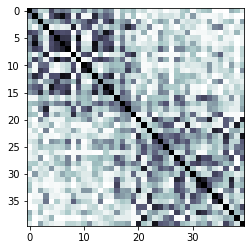

In [6]:
print("kernel matrix during the training:")
kernel_matrix = result['kernel_matrix_training']
img = plt.imshow(np.asmatrix(kernel_matrix), interpolation = 'nearest', origin = 'upper', cmap = 'bone_r')
plt.show()

In [8]:
predicted_labels = svm.predict(datapoints[0])
predicted_classes = map_label_to_class_name(predicted_labels, svm.label_to_class)
print("ground truth: {}".format(datapoints[1]))
print("prediction:    {}".format(predicted_labels))
print("testing success ratio: ", result['testing_accuracy'])

ground truth: [0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1]
prediction:    [0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1]
testing success ratio:  1.0
